In [70]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from transformers import BertForSequenceClassification

In [43]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T predict.csv

25


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   479    0     0  100   479      0   2294 --:--:-- --:--:-- --:--:--  2291
100   481  100     2  100   479      6   1599 --:--:-- --:--:-- --:--:--  1603


In [44]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T predict.txt

25


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   444  100     2  100   442      7   1759 --:--:-- --:--:-- --:--:--  1776


In [45]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T line63to84.txt

curl: Can't open 'line63to84.txt'!
curl: try 'curl --help' or 'curl --manual' for more information
curl: (26) Failed to open/read local data from file/application


In [46]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page1.txt

3


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2941    0     0  100  2941      0   2371  0:00:01  0:00:01 --:--:--  2373
100  2942    0     1  100  2941      0   1749  0:00:01  0:00:01 --:--:--  1751


In [47]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page2.txt

17


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2772    0     0  100  2772      0   2262  0:00:01  0:00:01 --:--:--  2264
100  2774  100     2  100  2772      1   1950  0:00:02  0:00:01  0:00:01  1953


In [48]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page3.txt

9


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2743    0     0  100  2743      0   2242  0:00:01  0:00:01 --:--:--  2244
100  2744    0     1  100  2743      0   2065  0:00:01  0:00:01 --:--:--  2067


In [49]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page4.txt

7

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2843    0     0  100  2843      0  14003 --:--:-- --:--:-- --:--:-- 14004
100  2843    0     0  100  2843      0   2348  0:00:01  0:00:01 --:--:--  2349
100  2844    0     1  100  2843      0   1827  0:00:01  0:00:01 --:--:--  1828


In [50]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page5.txt

12


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2738    0     0  100  2738      0   2251  0:00:01  0:00:01 --:--:--  2253
100  2740  100     2  100  2738      1   2099  0:00:02  0:00:01  0:00:01  2102


In [51]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page6.txt

5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2816    0     0  100  2816      0   2304  0:00:01  0:00:01 --:--:--  2306
100  2817    0     1  100  2816      0   2063  0:00:01  0:00:01 --:--:--  2065


In [52]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page7.txt

10


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2756    0     0  100  2756      0   2253  0:00:01  0:00:01 --:--:--  2255
100  2758  100     2  100  2756      1   2072  0:00:02  0:00:01  0:00:01  2075


In [53]:
datapath = f'/Users/Administrator/Downloads/ESG-BERT/ESG-BERT/networkrail.csv'
df = pd.read_csv(datapath)
df.head()

,Page number,Text,Label,score,label number
0,1,CORPORATE GOVERNANCE 90 94 Our board of direct...,Business_Model_Resilience,0.140759,3
1,2,Prior to this he spent 14 years at Rolls-Royce...,Supply_Chain_Management,0.498325,17
2,3,Current external appointments A member of the ...,Employee_Health_And_Safety,0.573026,9
3,4,Silla is a fellow of the Chartered Association...,Director_Removal,0.195375,7
4,5,Fiona is also a non-executive director at The ...,Management_Of_Legal_And_Regulatory_Framework,0.370767,12


In [54]:
!curl -X POST http://127.0.0.1:8080/predictions/bert -T page6.txt

5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2816    0     0  100  2816      0  13186 --:--:-- --:--:-- --:--:-- 13220
100  2816    0     0  100  2816      0   2295  0:00:01  0:00:01 --:--:--  2295
100  2817    0     1  100  2816      0   2043  0:00:01  0:00:01 --:--:--  2044


In [55]:
!pip install transformers

In [56]:
from transformers import pipeline
nlp = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [57]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'In fiscal year 2019, we reduced our comprehensive carbon footprint for the fourth consecutive year—down 35 percent compared to 2015, when Apple’s carbon emissions peaked, even as net revenue increased by 11 percent over that same period. In the past year, we avoided over 10 million metric tons from our emissions reduction initiatives—like our Supplier Clean Energy Program, which lowered our footprint by 4.4 million metric tons.'
nlp(text, return_all_scores=True)
top_k=1

C:\Users\Administrator\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:89: UserWarning: `return_all_scores` is now deprecated, use `top_k=1` if you want similar functionnality
  warnings.warn(


In [58]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'CORPORATE  GOVERNANCE  90  94  Our board of directors  Corporate governance report  104 Safety, health and environmental compliance committee report  107 Environmental sustainability committee report  109 Property supervisory committee report  111 Audit and risk committee report  117 Treasury committee report  119 Nomination and remuneration committee report  122 Directors’ remuneration report  134 Directors’ report  Annual Report and Accounts 2021   \\   Network Rail Limited   \\   89  \x0cCorporate governance  OUR BOARD OF DIRECTORS  Sir Peter  Hendy CBE Chair  Andrew  Haines OBE Chief executive  Skills and experience Sir Peter was commissioner of Transport  for London (TfL) from 2006 to 2015. He  led the successful operation of London’s  transport for the 2012 Olympic and  Paralympic Games: his experience in  leading urban transport in a world city is  critical to chairing Network Rail. Sir Peter  is a past international and UK president  of the Chartered Institute of Logistics  and Transport, is a fellow of the Chartered  Institute of Highways and Transport, and  of the Institution of Civil Engineers. He was  knighted in the 2013 New Year’s Honours  List, having been made CBE in 2006  for services to public transport and the  community in London.  Current external appointments Chair of London Legacy Development  Corporation; trustee of the Science Museum  Group; trustee and director of the London  Transport Museum; chair of London Freight  Enforcement Partnership; patron of the  Independent Transport Commission;  Network Rail representative at the  Transport for the North; chair of the Euston  Partnership Board; and honorary president  of the London Bus Museum. He is currently  reviewing the connectivity of the United  Kingdom, reporting to the Prime Minister.  Committee membership Chair of the property supervisory  committee; nomination and remuneration  committee; safety, health and  environmental compliance committee.  Appointed to the Board: 2015  Skills and experience Andrew was previously chief executive officer of the Civil Aviation Authority  from 2009-2018. Prior to that he had a wide-ranging career within the rail  industry with British Rail, Railtrack, South West Trains and FirstGroup plc  where he led the rail division in England, Scotland and Wales. In addition,  he was a non-executive director at a rolling stock leasing company.   Andrew was awarded an OBE in the 2016 New Year Honour’s list for  services to transport and is a fellow of the Chartered Institute of Logistics  and Transport, the Royal Aeronautical Society, the Institute of Railway  Operators and the Permanent Way Institute.  Appointed to the Board: 2018  Jeremy  Westlake Chief financial  officer  Skills and experience Jeremy was formerly senior vice president for finance at Alstom Transport in  France, responsible for financial performance and control, project finance and  investor management.'
nlp(text, return_all_scores=True)

[{'label': 'Business_Ethics', 'score': 0.02698638290166855},
 {'label': 'Data_Security', 'score': 0.03920561447739601},
 {'label': 'Access_And_Affordability', 'score': 0.01348820049315691},
 {'label': 'Business_Model_Resilience', 'score': 0.14075927436351776},
 {'label': 'Competitive_Behavior', 'score': 0.007755822967737913},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.015985149890184402},
 {'label': 'Customer_Welfare', 'score': 0.01697271317243576},
 {'label': 'Director_Removal', 'score': 0.07718420028686523},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.054747484624385834},
 {'label': 'Employee_Health_And_Safety', 'score': 0.09422693401575089},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.047576747834682465},
 {'label': 'Labor_Practices', 'score': 0.018297264352440834},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.10691768676042557},
 {'label': 'Physical_Impacts_Of_Climate_Change', 'score': 0.03110

In [59]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text ='Prior to this he spent 14 years at Rolls-Royce in a range  of senior finance and supply chain roles both in the UK and the United States.   Jeremy is a fellow of the Institute of Chartered Accountants in England and  Wales and has a Master’s in manufacturing from the University of Cambridge.  Current external appointments Non-executive director of Elevate Services Inc., providing technology and  services to law firms and law departments.  Committee membership Property supervisory committee  Appointed to the Board: 2016  90   /   Network Rail Limited   /   Annual Report and Accounts 2021  \x0cCorporate governance  Ismail  Amla Non-executive  director  Mark  Bayley CBE Non-executive  director  Skills and experience Ismail has extensive international experience helping  leading brands and disruptive start-ups leverage emerging  technologies.  He is the chief growth officer at Capita where he is  responsible for driving sales, the brand position and  marketing, and Capita’s strategy for key clients.  Prior to this, Ismail was the managing partner in IBM,  leading the North American Services business; chief  executive officer for the consulting firm Capco in North  America; and on the leadership team for Accenture in the UK.  Current external appointments Chief growth officer at Capita; a board member at UK  Sports; a member of the board of governors at at University  of East London.  Committee membership Nomination and remuneration committee.  Appointed to the Board: 1 April 2021  Skills and experience Mark has spent much of his career in the rail sector. He was  chief executive of London & Continental Railways Limited,  and chief executive of the Green Deal Finance Company  (GDFC). His interim work includes commercial director of  High Speed 2 Ltd, and chief financial officer and board  director of the Submarine Delivery Agency at the Ministry  of Defence.   Mark was awarded a CBE in 2012 for services to the rail  industry.  Current external appointments Non-executive director of Ofwat; non-executive director of  UK Atomic Energy Authority; a member of the DfT’s Group  Audit and Risk Assurance Committee.  Committee membership Chair of the audit and risk committee; chair of the treasury  committee; property supervisory committee.  Appointed to the Board: 2020  Rob  Brighouse Senior  independent  non-executive  director  Skills and experience Rob has 40-years’ experience in the rail industry and was previously the  managing director of Chiltern Railways. He first joined the rail operator in 2000  as projects director, where he led the Evergreen 1 and 2 infrastructure projects  as well as the building of Chiltern’s Wembley depot.   Rob is a fellow of the Institution of Civil Engineers and the Institute of Directors.'
nlp(text, return_all_scores=True)

[{'label': 'Business_Ethics', 'score': 0.006055959966033697},
 {'label': 'Data_Security', 'score': 0.006693198811262846},
 {'label': 'Access_And_Affordability', 'score': 0.006696170661598444},
 {'label': 'Business_Model_Resilience', 'score': 0.238533154129982},
 {'label': 'Competitive_Behavior', 'score': 0.008595728315412998},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.004203757271170616},
 {'label': 'Customer_Welfare', 'score': 0.016971005126833916},
 {'label': 'Director_Removal', 'score': 0.0202983058989048},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.009091089479625225},
 {'label': 'Employee_Health_And_Safety', 'score': 0.005022520665079355},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.010943597182631493},
 {'label': 'Labor_Practices', 'score': 0.007391542661935091},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.005128140095621347},
 {'label': 'Physical_Impacts_Of_Climate_Change',
  'score': 0.

In [60]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'Current external appointments A member of the Advisory Board at Aston Business School; advisor to the Board  and the Programme Board of Dublin Area Rapid Transit (DART).   Committee membership Safety, health and environmental compliance committee; audit and risk  committee; environmental sustainability committee.  Appointed to the Board: 2016  Annual Report and Accounts 2021   \\   Network Rail Limited   \\   91  \x0cCorporate governance  Stephen  Duckworth  OBE Non-executive  director  Skills and experience Stephen founded and ran Disability  Matters Limited, a research and  consultancy business with an  emphasis on inclusive design. He  initially qualified as a medical doctor  and followed this with an MSc in  rehabilitation studies and a PhD in  disability equality.  Stephen currently sits on the  boards of several organisations,  has held numerous advisory roles  to government, and carried out  consultancy work with Southwest  Trains and Eurostar.   He was awarded an OBE for services  to disabled people in 1994.  Current external appointments Non-executive director of Palace of  Westminster Restoration & Renewal  Delivery Authority; trustee of Leonard  Cheshire; trustee of the Rugby Football  Union Injured Players Foundation.  Committee membership Audit and risk committee; standing  invitation to the safety, health and  environmental compliance committee.  Appointed to the Board: 1 April 2021  Michael  Harrison Special  director and  non-executive  director   Skills and experience Michael is a director in UK  Government Investments (UKGI) an  arm’s length body of HM Treasury.  As part of this role Michael has  been a non-executive director of a  number of companies in which the  UK Government has a shareholding  including Porton Biopharma,  Ordnance Survey, the Met Office, and  Working Links.   Prior to working in UKGI Michael  had a broad international corporate  finance advisory career working for  Credit Suisse First Boston, Barclays  de Zoete Wedd, and as independent  corporate finance advisor at Caliburn  in Australia.   Current external appointments Employee of UK Government  Investments (UKGI).  Committee membership Nomination and remuneration  committee; audit and risk committee;  treasury committee.  Appointed to the Board: 2020  Silla  Maizey Non-executive  director  Skills and experience Silla has over 34 years’ experience in  the aviation sector, and most recently  was British Airways’ (BA) managing  director of Gatwick. She was part of  BA’s executive leadership team and  BA’s customer director.   Silla brings a range of experience and  insights to the Board, from operations  to procurement, the shaping of the  customer proposition and business  reorganisations.'
nlp(text, return_all_scores=True)


[{'label': 'Business_Ethics', 'score': 0.006117835175246},
 {'label': 'Data_Security', 'score': 0.004986163228750229},
 {'label': 'Access_And_Affordability', 'score': 0.09241024404764175},
 {'label': 'Business_Model_Resilience', 'score': 0.008092835545539856},
 {'label': 'Competitive_Behavior', 'score': 0.004507259465754032},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.004922228865325451},
 {'label': 'Customer_Welfare', 'score': 0.011344545520842075},
 {'label': 'Director_Removal', 'score': 0.002857235027477145},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.1426868587732315},
 {'label': 'Employee_Health_And_Safety', 'score': 0.5730263590812683},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.024614432826638222},
 {'label': 'Labor_Practices', 'score': 0.007358228322118521},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.006276377942413092},
 {'label': 'Physical_Impacts_Of_Climate_Change',
  'score': 0.003

In [61]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'Silla is a fellow of the Chartered  Association of Certified Accountants  and a fellow of the Chartered Institute  of Purchasing and Supply.  Current external appointments Chair of NHS Business Services  Authority; non-executive director  of John Menzies plc; non-executive  director of the Crown Commercial  Service.  Committee membership Audit and risk committee; treasury  committee.  Appointed to the Board: 2016  Sharon Flood resigned as a  director on 23 August 2020.  92   /   Network Rail Limited   /   Annual Report and Accounts 2021  \x0cCorporate governance  David  Noyes Non-executive  director  Mike  Putnam Non-executive  director  Skills and experience David has spent his career working  in the leisure and transport sectors.  In a 20-year career at British Airways  he held various directorships, and  subsequently until December 2017  David was chief executive officer  of Cunard and P&O Cruises, and a  director of Carnival plc.  David is experienced in leading  devolved businesses in safety critical  industries with a focus on delivering  customer service excellence and  driving cost efficiency.   Current external appointments Non-executive chair of Grays of  Cambridge (International) Limited;  non-executive director London Luton  Airport Operations Ltd; corporate  advisory board member for The  Teenage Cancer Trust.  Committee membership Chair of the nomination and  remuneration committee; chair of  the environmental sustainability  committee; safety, health and  environmental compliance committee.  Appointed to the Board: 2018  Skills and experience Mike has over 25 years’ executive  experience across the development,  construction and services sectors, and  participated in successfully delivering  high profile projects.  Mike was president and chief executive  officer of Skanska UK plc until May  2017. Having been executive vice- president and a director, responsible  for the infrastructure and then the  building and construction businesses.  Mike is a Chartered Engineer and a  fellow of both the Institution of Civil  Engineers and Royal Institution of  Chartered Surveyors.  Current external appointments Non-executive director of Southern  Water Services Limited and Bazalgette  Tunnel Limited; member of the DfT’s  Acceleration Unit Expert Panel; a  member of the Supervisory Board of  Arcadis NV.  Committee membership Chair of the safety, health and  environmental compliance committee;  environmental sustainability committee.  Appointed to the Board: 2018  Fiona Ross Non-executive  director  Skills and experience Fiona is an experienced chair and non- executive director having served on  boards in Ireland and the UK. Fiona  chairs the Córas Iompair Éireann  (CIÉ), Ireland’s pubic transport  provider, and is a Board member  of the HSE, Ireland’s public health  service.'
nlp(text, return_all_scores=True)

[{'label': 'Business_Ethics', 'score': 0.04559753090143204},
 {'label': 'Data_Security', 'score': 0.03882487118244171},
 {'label': 'Access_And_Affordability', 'score': 0.009691867977380753},
 {'label': 'Business_Model_Resilience', 'score': 0.1388912796974182},
 {'label': 'Competitive_Behavior', 'score': 0.007859894074499607},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.010759010910987854},
 {'label': 'Customer_Welfare', 'score': 0.013943884521722794},
 {'label': 'Director_Removal', 'score': 0.195374995470047},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.031401049345731735},
 {'label': 'Employee_Health_And_Safety', 'score': 0.05288393422961235},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.03213023394346237},
 {'label': 'Labor_Practices', 'score': 0.019707467406988144},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.040246520191431046},
 {'label': 'Physical_Impacts_Of_Climate_Change', 'score': 0.018525

In [62]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'Fiona is also a non-executive  director at The Scottish Government.   Fiona began her career as a  stockbroker in London. In 2012  she was awarded a fellowship in  Governance at George Washington  University in the United States.  Current external appointments Chair of Córas Iompair Éireann;  non-executive director HSE Ireland;  non-executive director of The Scottish  Government; non-executive director  JK Funds; non-executive director of  SphereInvest (a UCITs fund listed  in Dublin; chair of the audit and risk  committee of Smith & Williamson.  Committee membership Nomination and remuneration  committee; environmental  sustainability committee.  Appointed to the Board: 2020  Stuart  Kelly Group general  counsel and  company  secretary  Skills and experience Stuart is responsible for the Legal and Corporate Services function. Stuart has  extensive in-house legal and corporate governance experience gained within the  listed environment, having joined the company from Severn Trent plc where he  held the position of Deputy General Counsel.   Stuart started his in-house legal career with Network Rail, prior to which he was a  solicitor in private practice. Stuart is also a qualified civil engineer.   Annual Report and Accounts 2021   \\   Network Rail Limited   \\   93  \x0cCorporate governance  CORPORATE  GOVERNANCE REPORT  At Network Rail, we recognise the value of good corporate governance and believe that it’s  essential to the success of the company and to delivering our strategy for passengers and  stakeholders. Throughout 2020/21, we’ve ensured that our governance arrangements are  appropriate to the range of challenges we’ve faced. We’ve acted on external feedback and  corporate governance reviews to maintain a high standard of governance.  Covid-19 governance  Devolution  In response to the pandemic we activated our Strategic  Crisis Management Team (SCMT). Led by the director  of Network Services, the SCMT includes colleagues from  across the organisation and is responsible for managing the  impact of coronavirus on the railway, our passengers and  our people. The SCMT initially met daily, and then weekly,  to coordinate the continuity of the company’s business and  keep the railway open.   The SCMT has been supported by the National Alert  Coordination Group, which manages the logistical response  to the pandemic within Network Rail. This included  ensuring our workforce had the right personal protective  equipment to continue working safely and coordinating our  testing programme to provide an extra layer of protection  for our people. Command structures within our regions and  directorates also implemented necessary policy changes  and managed day-to-day issues.'
nlp(text, return_all_scores=True)

[{'label': 'Business_Ethics', 'score': 0.08620087057352066},
 {'label': 'Data_Security', 'score': 0.021570980548858643},
 {'label': 'Access_And_Affordability', 'score': 0.008286779746413231},
 {'label': 'Business_Model_Resilience', 'score': 0.06822171062231064},
 {'label': 'Competitive_Behavior', 'score': 0.009668498300015926},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.012136489152908325},
 {'label': 'Customer_Welfare', 'score': 0.007247056346386671},
 {'label': 'Director_Removal', 'score': 0.13282634317874908},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.031772322952747345},
 {'label': 'Employee_Health_And_Safety', 'score': 0.010964145883917809},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.053861379623413086},
 {'label': 'Labor_Practices', 'score': 0.016985952854156494},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.3707669973373413},
 {'label': 'Physical_Impacts_Of_Climate_Change', 'score': 0.02

In [63]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'With the Rail Delivery Group, we created the Joint Executive  Oversight Team where we worked to coordinate an industry- wide response. And the Rail Industry Coronavirus Forum set  up Emergency Working Principles Agreements that enabled  Network Rail and the trades unions to prioritise activities  and work more quickly.  Our Board, its committees and the executive leadership  team have continued to meet online to ensure we meet the  needs of the railway. See page 15 for more on our response  to the pandemic.  In 2019 we started our Putting Passengers First journey with a  reorganisation. We devolved accountabilities and established  platforms for us to deliver value for money to those we serve.  We’ve made good progress, with new ways of working already  reaping rewards for our customers and passengers.  Because of the added challenges caused by the pandemic,  we’ve re organised ourselves to strengthen devolution  and be more agile and efficient. To give us fewer network- wide functions at executive level, we’ve transferred the  responsibilities of both Network Services and the Group  Transformation team into other existing network-wide  functions.  Network Services provided services to our routes and regions,  as well as network-wide operational oversight. We’ve put  Network Services’ route/region services together with Route  Services so there’s one place for interaction with internal  customers, routes and regions. And to support better  oversight and decision making across the full performance  cycle of the railway, we’ve moved Network Services’ activities  that help the rail network operate effectively as a system  into System Operator. We believe this will provide the best  operational service for our customers and passengers.  There were previously teams leading on transformation at  a network-wide level in Group Transformation and within  Network Services. We’ve now transferred these teams to  Group HR.  For more information on our Putting Passengers First  programmee se page 20.  94   /   Network Rail Limited   /   Annual Report and Accounts 2021  \x0cRail Reform  On 20 May 2021 the Government published “Great British  Railways: Williams-Shapps Plan for Rail – White Paper”.  It shows how the Government “will make railways the  backbone of a cleaner, more environmentally friendly and  modern public transport system across the country.  “By replacing franchising, accelerating innovation and  integrating the railways, Great British Railway will deliver an  efficient, financially sustainable railway that meets the needs  of passengers and those who rely on rail on a daily basis.”  The Board fully supports the Williams-Shapps Plan for  Rail and will work closely with industry partners and key  stakeholders to deliver its objectives.'
nlp(text, return_all_scores=True)

[{'label': 'Business_Ethics', 'score': 0.0034608650021255016},
 {'label': 'Data_Security', 'score': 0.002283637411892414},
 {'label': 'Access_And_Affordability', 'score': 0.006573802791535854},
 {'label': 'Business_Model_Resilience', 'score': 0.0028728994075208902},
 {'label': 'Competitive_Behavior', 'score': 0.0013157433131709695},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.893149197101593},
 {'label': 'Customer_Welfare', 'score': 0.001270620501600206},
 {'label': 'Director_Removal', 'score': 0.001540635945275426},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.0010165564017370343},
 {'label': 'Employee_Health_And_Safety', 'score': 0.007751109078526497},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.004350394010543823},
 {'label': 'Labor_Practices', 'score': 0.0014376810286194086},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.0016854567220434546},
 {'label': 'Physical_Impacts_Of_Climate_Change',
  'sc

In [64]:
nlp = pipeline("text-classification", model="nbroad/ESG-BERT")
text = 'Engaging with our stakeholders  At Network Rail we consider our stakeholders to be at the  heart of our strategy. The interests of key stakeholders  and the matters set out in section 172 of the Companies  Act 2006 (i.e. promoting success of the company)  (see pages 24 to 25) have been considered in Board  discussions and decision making.   The Putting Passengers First programme was built on an  extensive listening exercise. We listened to a wide variety  of stakeholders to help us understand what the company  does well and where it needs to improve. We engaged with  more than 300 colleagues at all levels, across the country,  including frontline and office based, as well as external  partners and organisations. The outcomes informed our  Putting Passengers First programme.  Railway supervisory boards comprising Network Rail, train  operating companies, Transport Focus, and other key  stakeholders provide forums for discussions to identify  opportunities to improve the experience of all passengers  and freight users. The aim of these boards is to bring  track and train closer together. Meetings were held in the  Western route, Wales route, Anglia route, West Coast Main  Line, and Chilterns; the System Operator Advisory Board  provides a similar function.  Engaging with our workforce  We recognise that employees who feel actively engaged with  the company, its purpose, vision and strategy and who feel   Corporate governance  listened to, are more likely to feel that their work is meaningful  and will make a difference for users of the railway.  Since its development, the Network Rail Story (see page  8) has been the foundation of our workforce engagement.  We’ve a wide range of initiatives through which we engage  with our people, including: •  Putting Passengers First programme; •  systems thinking interventions; •  listening programmes; •  business briefings; •  employee networks; •  reverse mentoring •  Trade Union engagement; and •  employee newsletters (The Network and Front Line Focus).  As well as this, we use regular employee engagement  surveys to understand what our people are thinking and  feeling at a given time. The surveys show whether there has  been an improvement compared with previous years, and if  further action is needed. There are three surveys each year.  In 2021 there will be a full Your Voice survey, and two Your  Voice pulse surveys focussing on progress and direction.  Our Board is briefed on the outcome of the surveys and  considers any actions required. Our routes and functions  also run additional, locally focussed surveys if needed.   See How we engage with our stakeholders on pages 24 and  25 for more information on how and why we engage with   our workforce.'
nlp(text, return_all_scores=True)

[{'label': 'Business_Ethics', 'score': 0.050857044756412506},
 {'label': 'Data_Security', 'score': 0.01650450937449932},
 {'label': 'Access_And_Affordability', 'score': 0.02531871199607849},
 {'label': 'Business_Model_Resilience', 'score': 0.10618811100721359},
 {'label': 'Competitive_Behavior', 'score': 0.01642017439007759},
 {'label': 'Critical_Incident_Risk_Management', 'score': 0.0067586749792099},
 {'label': 'Customer_Welfare', 'score': 0.018877267837524414},
 {'label': 'Director_Removal', 'score': 0.051056887954473495},
 {'label': 'Employee_Engagement_Inclusion_And_Diversity',
  'score': 0.12261566519737244},
 {'label': 'Employee_Health_And_Safety', 'score': 0.03285074234008789},
 {'label': 'Human_Rights_And_Community_Relations',
  'score': 0.24431219696998596},
 {'label': 'Labor_Practices', 'score': 0.022593433037400246},
 {'label': 'Management_Of_Legal_And_Regulatory_Framework',
  'score': 0.11321494728326797},
 {'label': 'Physical_Impacts_Of_Climate_Change',
  'score': 0.00914

In [65]:
datapath = f'/Users/Administrator/Downloads/ESG-BERT/ESG-BERT/networkrail.csv'
df = pd.read_csv(datapath)
df.head()

,Page number,Text,Label,score,label number
0,1,CORPORATE GOVERNANCE 90 94 Our board of direct...,Business_Model_Resilience,0.140759,3
1,2,Prior to this he spent 14 years at Rolls-Royce...,Supply_Chain_Management,0.498325,17
2,3,Current external appointments A member of the ...,Employee_Health_And_Safety,0.573026,9
3,4,Silla is a fellow of the Chartered Association...,Director_Removal,0.195375,7
4,5,Fiona is also a non-executive director at The ...,Management_Of_Legal_And_Regulatory_Framework,0.370767,12


Text(0.5, 1.0, 'ESG scores')

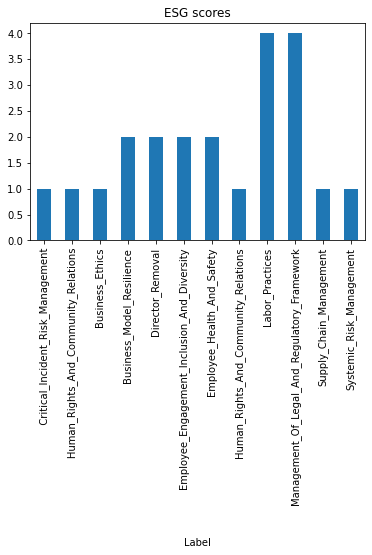

In [75]:
df.groupby(['Label']).size().plot.bar()
plt.title("ESG scores")

<AxesSubplot:xlabel='score'>

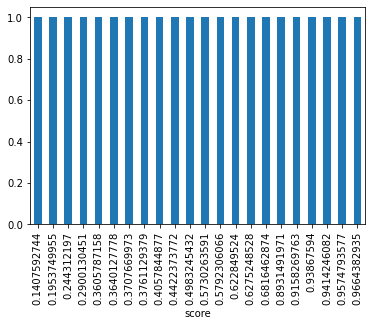

In [40]:
df.groupby(['score']).size().plot.bar()

In [41]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

example_text = 'CORPORATE  GOVERNANCE  90  94  Our board of directors  Corporate governance report  104 Safety, health and environmental compliance committee report  107 Environmental sustainability committee report  109 Property supervisory committee report  111 Audit and risk committee report  117 Treasury committee report  119 Nomination and remuneration committee report  122 Directors’ remuneration report  134 Directors’ report  Annual Report and Accounts 2021   \\   Network Rail Limited   \\   89  \x0cCorporate governance  OUR BOARD OF DIRECTORS  Sir Peter  Hendy CBE Chair  Andrew  Haines OBE Chief executive  Skills and experience Sir Peter was commissioner of Transport  for London (TfL) from 2006 to 2015. He  led the successful operation of London’s  transport for the 2012 Olympic and  Paralympic Games: his experience in  leading urban transport in a world city is  critical to chairing Network Rail. Sir Peter  is a past international and UK president  of the Chartered Institute of Logistics  and Transport, is a fellow of the Chartered  Institute of Highways and Transport, and  of the Institution of Civil Engineers. He was  knighted in the 2013 New Year’s Honours  List, having been made CBE in 2006  for services to public transport and the  community in London.  Current external appointments Chair of London Legacy Development  Corporation; trustee of the Science Museum  Group; trustee and director of the London  Transport Museum; chair of London Freight  Enforcement Partnership; patron of the  Independent Transport Commission;  Network Rail representative at the  Transport for the North; chair of the Euston  Partnership Board; and honorary president  of the London Bus Museum. He is currently  reviewing the connectivity of the United  Kingdom, reporting to the Prime Minister.  Committee membership Chair of the property supervisory  committee; nomination and remuneration  committee; safety, health and  environmental compliance committee.  Appointed to the Board: 2015  Skills and experience Andrew was previously chief executive officer of the Civil Aviation Authority  from 2009-2018. Prior to that he had a wide-ranging career within the rail  industry with British Rail, Railtrack, South West Trains and FirstGroup plc  where he led the rail division in England, Scotland and Wales. In addition,  he was a non-executive director at a rolling stock leasing company.   Andrew was awarded an OBE in the 2016 New Year Honour’s list for  services to transport and is a fellow of the Chartered Institute of Logistics  and Transport, the Royal Aeronautical Society, the Institute of Railway  Operators and the Permanent Way Institute.  Appointed to the Board: 2018  Jeremy  Westlake Chief financial  officer  Skills and experience Jeremy was formerly senior vice president for finance at Alstom Transport in  France, responsible for financial performance and control, project finance and  investor management.'
bert_input = tokenizer(example_text,padding='max_length', max_length = 512, 
                       truncation=True, return_tensors="pt")

In [27]:
print(bert_input['input_ids'])
print(bert_input['token_type_ids'])
print(bert_input['attention_mask'])

tensor([[  101, 18732, 20336,  9565, 13821,  2036, 27157, 17145, 15654, 15517,
          2036,  3078,  5706,  3458,  2313,  1104,  6435, 15978, 12711,  2592,
          9377,  9218,   117,  2332,  1105,  4801, 14037,  3914,  2592, 10428,
          8019, 20598,  3914,  2592, 11523, 13563, 16014,  1183,  3914,  2592,
         11084, 22139,  1204,  1105,  3187,  3914,  2592, 12737, 11712,  3914,
          2592, 13606,  1302,  9204,  1105,  1231, 13601,  2511,  1891,  3914,
          2592, 13381,  9970,   787,  1231, 13601,  2511,  1891,  2592, 15917,
          9970,   787,  2592,  8451,  7178,  1105,   138, 14566, 17430, 17881,
          1475,   165,  3998,  8654,  5975,   165,  5840, 15978, 12711,   152,
         19556,   139, 23579, 23354, 11345,   141, 18172,  8231, 18082,  8900,
          2203,  1943,  1124, 22600, 16779,  7507,  3217, 18745,  3965, 16611,
          2534,  3275, 26210,  1105,  2541,  2203,  1943,  1108, 12425,  1104,
          5371,  1111,  1498,   113,   157,  2087,  

In [28]:
example_text = tokenizer.decode(bert_input.input_ids[0])

In [29]:
print(example_text)

[CLS] CORPORATE GOVERNANCE 90 94 Our board of directors Corporate governance report 104 Safety, health and environmental compliance committee report 107 Environmental sustainability committee report 109 Property supervisory committee report 111 Audit and risk committee report 117 Treasury committee report 119 Nomination and remuneration committee report 122 Directors ’ remuneration report 134 Directors ’ report Annual Report and Accounts 2021 \ Network Rail Limited \ 89 Corporate governance OUR BOARD OF DIRECTORS Sir Peter Hendy CBE Chair Andrew Haines OBE Chief executive Skills and experience Sir Peter was commissioner of Transport for London ( TfL ) from 2006 to 2015. He led the successful operation of London ’ s transport for the 2012 Olympic and Paralympic Games : his experience in leading urban transport in a world city is critical to chairing Network Rail. Sir Peter is a past international and UK president of the Chartered Institute of Logistics and Transport, is a fellow of the 

In [30]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'Business_Ethics':  0,
        'Data_Security':  1,
        'Access_And_Affordability':  2,
        'Business_Model_Resilience':  3,
        'Competitive_Behavior':  4,
        'Critical_Incident_Risk_Management':  5,
        'Customer_Welfare':  6,
        'Director_Removal':  7,
        'Employee_Engagement_Inclusion_And_Diversity':  8,
        'Employee_Health_And_Safety':  9,
        'Human_Rights_And_Community_Relations':  10,
        'Labor_Practices':  11,
        'Management_Of_Legal_And_Regulatory_Framework':  12,
        'Physical_Impacts_Of_Climate_Change':  13,
        'Product_Quality_And_Safety':  14,
        'Product_Design_And_Lifecycle_Management':  15,
        'Selling_Practices_And_Product_Labeling':  16,
        'Supply_Chain_Management':  17,
        'Systemic_Risk_Management':  18,
        'label__Waste_And_Hazardous_Materials_Management':  19,
        'Water_And_Wastewater_Management':  20,
        'Air_Quality':  21,
        'Customer_Privacy':  22,
        'Ecological_Impacts':  23,
        'Energy_Management':  24,
        'GHG_Emissions':  25
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['Label']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [31]:
np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])


In [32]:
print(len(df_train),len(df_val), len(df_test))

17 2 3


In [33]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer